**Анализ данных о покупках** 



Датасет - информация о покупках клиентов:

**Дата** - время покупки

**Транзакция** - уникальный номер покупки

**Клиент** - уникальный номер клиента

**Товар** - уникальный номер товара

**Количество** - количество купленных товаров

**Сумма** - цена покупки этого товара

### 1. Импорт библиотек

In [1]:
#Ваш код
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.colors import from_levels_and_colors
import seaborn as sns
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings('ignore')

# увеличим дефолтный размер графиков
from pylab import rcParams

rcParams["figure.figsize"] = 10, 6
#sns.set_style("whitegrid", {'axes.grid' : True})

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [4]:
import scipy

Подключение библиотек:nump, pundus,matplotlib,datetime,seaborn,sklearn,scipy

### 2. Загрузка данных

In [5]:
#Ваш код
df=pd.read_csv('dataset.csv',sep=';')

In [6]:
df.head()

,Дата,Транзакция,Клиент,Товар,Количество,Сумма
0,03.05.2020 21:43,954,1,2874.0,1.0,8150.0
1,20.11.2020 20:46,13796,1,3586.0,1.0,3930.0
2,08.12.2020 16:28,14431,1,4942.0,1.0,2860.0
3,03.05.2020 21:15,951,2,2812.0,1.0,4895.0
4,20.05.2020 16:46,3352,2,5025.0,1.0,840.0


In [7]:
df.tail()

,Дата,Транзакция,Клиент,Товар,Количество,Сумма
48298,06.07.2021 15:00,25398,11049,1211.0,1.0,20500.0
48299,06.07.2021 15:13,25399,11049,3034.0,1.0,21950.0
48300,06.07.2021 15:02,25412,11050,443.0,1.0,1490.0
48301,06.07.2021 15:02,25412,11050,2789.0,1.0,9450.0
48302,06.07.2021 15:02,25412,11050,2715.0,1.0,5490.0


In [8]:
df.columns = df.columns.str.lower()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48303 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   дата        48303 non-null  object 
 1   транзакция  48303 non-null  int64  
 2   клиент      48303 non-null  int64  
 3   товар       48273 non-null  float64
 4   количество  48303 non-null  float64
 5   сумма       48303 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.2+ MB


In [10]:
#перевод в формат времени
df['дата']=pd.to_datetime(df['дата'])

In [11]:
df.head()

,дата,транзакция,клиент,товар,количество,сумма
0,2020-03-05 21:43:00,954,1,2874.0,1.0,8150.0
1,2020-11-20 20:46:00,13796,1,3586.0,1.0,3930.0
2,2020-08-12 16:28:00,14431,1,4942.0,1.0,2860.0
3,2020-03-05 21:15:00,951,2,2812.0,1.0,4895.0
4,2020-05-20 16:46:00,3352,2,5025.0,1.0,840.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48303 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   дата        48303 non-null  datetime64[ns]
 1   транзакция  48303 non-null  int64         
 2   клиент      48303 non-null  int64         
 3   товар       48273 non-null  float64       
 4   количество  48303 non-null  float64       
 5   сумма       48303 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.2 MB


In [13]:
# проверка уникальных значений
bin_var=['клиент','количество']
for col in bin_var:
    print('-----{}-----'.format(col))
    print(df[col].unique())
    print('-----')

-----клиент-----
[    1     2     3 ... 11048 11049 11050]
-----
-----количество-----
[1.]
-----


В разделе "Загрузка данных" выполнила следующие действия:
1. Загрузила данные через метод pd.read_csv
2. Произвела "визуальный осмотр" первых и последних столбцов
3. Изменила регистр во всех столбцах(все столбцы начинаются с маленькой буквы)
4. первичный анализ нформации  DataFrame (dataset) показал, что необходимо изменить тип столбцов 'дата', 'товара' и 'количества'
5. Провела проверку уникальных значений столбцов. Проверка показала, что аномальных значений нет

### 3. Очистка данных

**Преобразование данных, обработка пропусков, удаление дубликатов**

In [14]:
#перевод в формат времени
df['дата']=pd.to_datetime(df['дата'])

In [15]:
df.head()

,дата,транзакция,клиент,товар,количество,сумма
0,2020-03-05 21:43:00,954,1,2874.0,1.0,8150.0
1,2020-11-20 20:46:00,13796,1,3586.0,1.0,3930.0
2,2020-08-12 16:28:00,14431,1,4942.0,1.0,2860.0
3,2020-03-05 21:15:00,951,2,2812.0,1.0,4895.0
4,2020-05-20 16:46:00,3352,2,5025.0,1.0,840.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48303 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   дата        48303 non-null  datetime64[ns]
 1   транзакция  48303 non-null  int64         
 2   клиент      48303 non-null  int64         
 3   товар       48273 non-null  float64       
 4   количество  48303 non-null  float64       
 5   сумма       48303 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 2.2 MB


In [17]:
#Ваш кодповерка на нулевые значения
df.isnull().sum()

дата           0
транзакция     0
клиент         0
товар         30
количество     0
сумма          0
dtype: int64

In [18]:
df['товар'].isnull().mean()*100

0.06210794360598721

Пропущенных значений составляет менее 1%. Можно удалить столбцы без потери качество данных

In [19]:
df.duplicated().sum()

1128

In [20]:
df=df.drop_duplicates()

In [21]:
df.duplicated().sum()

0

In [22]:
df['товар'].isnull().mean()*100

0.061473237943826184

In [23]:
#удаление нулевых значений
df=df[~df['товар'].isnull()]
#df1.fillina(0)

In [24]:
df['товар'].isnull().mean()*100

0.0

In [25]:
# изменение типа у столбцов товар и количество
df=df.astype({'товар':'int64','количество':'int64'})

В разделе "Очистка данных" выполнила следующие действия:
1. Проверила dataset на наличие дубликато(число дубликатов 1128)
2. Удалила дубликаты
3. Провела проверку dataset на наличие нулевых или пропущенных значений. В столбце "товар" пропущены 30 ячеек, что состовляет менее 1% от общего количества строк в dataset.
4. Удалила нулевые значения в dataset
5. Изменила тип данных столбцов "товар" и "количество" с float64 на int64
6. Изменила тип данных столбца "дата" с object на datetime64

### 4. EDA 
 
**Описательная статистика, поиск взаимосвязей**

In [28]:
df1=df
df1['year']=df1["дата"].dt.date
df1['hours']=df1["дата"].dt.hour
df1['time'] = pd.to_timedelta(df1['дата'].dt.strftime('%H:%M:%S'))
#print (df)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47146 entries, 0 to 48302
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   дата        47146 non-null  datetime64[ns] 
 1   транзакция  47146 non-null  int64          
 2   клиент      47146 non-null  int64          
 3   товар       47146 non-null  float64        
 4   количество  47146 non-null  float64        
 5   сумма       47146 non-null  float64        
 6   year        47146 non-null  object         
 7   hours       47146 non-null  int64          
 8   time        47146 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1), timedelta64[ns](1)
memory usage: 3.6+ MB


In [29]:
df1.head()

,дата,транзакция,клиент,товар,количество,сумма,year,hours,time
0,2020-03-05 21:43:00,954,1,2874.0,1.0,8150.0,2020-03-05,21,0 days 21:43:00
1,2020-11-20 20:46:00,13796,1,3586.0,1.0,3930.0,2020-11-20,20,0 days 20:46:00
2,2020-08-12 16:28:00,14431,1,4942.0,1.0,2860.0,2020-08-12,16,0 days 16:28:00
3,2020-03-05 21:15:00,951,2,2812.0,1.0,4895.0,2020-03-05,21,0 days 21:15:00
4,2020-05-20 16:46:00,3352,2,5025.0,1.0,840.0,2020-05-20,16,0 days 16:46:00


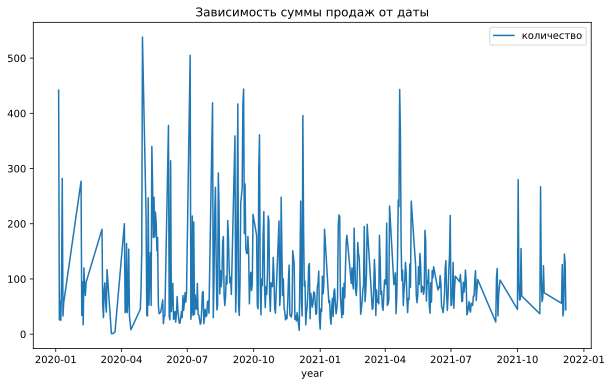

In [30]:
#График зависимости даты от суммы продаж

df_g=df1[['количество','year']].groupby('year').sum().sort_values('year',ascending=True)
#df_g.info
df_g.plot()
plt.title("Зависимость суммы продаж от даты")
plt.show()

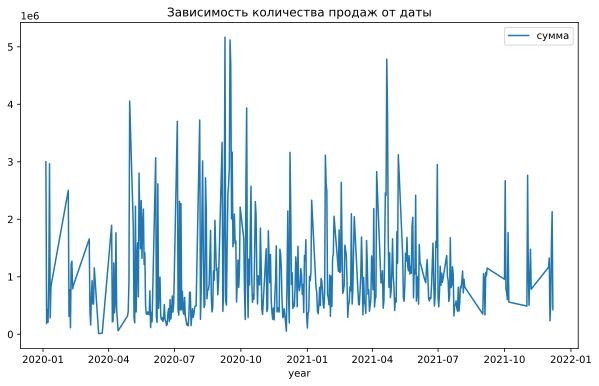

In [31]:
#График зависимости даты от количества продаж
df_k=df1[['сумма','year']].groupby('year').sum().sort_values('year',ascending=True)
df_k.plot()
plt.title("Зависимость количества продаж от даты")
plt.show()

4.1.  На рис. представлены графики зависимости суммы продаж от даты количества продаж от даты. Оба графика идентичны.
Характер  графиков в общем можно охарактеризовать как "разнородный" шум со случайными пиками  .


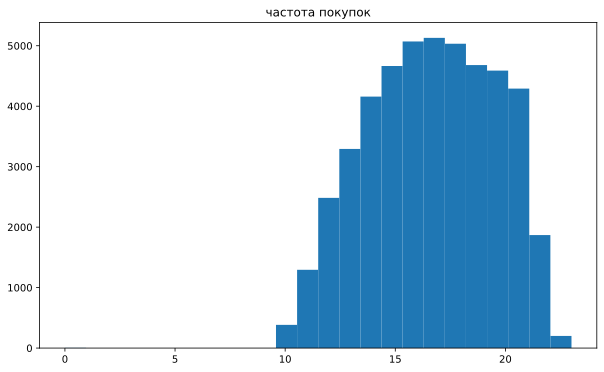

In [32]:
plt.hist(df1['hours'],bins=24)
plt.title('частота покупок')
plt.show()

4.2. На данной гистограмме  распределение  покупок по времени имеет нормальное распределение. Пик продаж приходится на интервал от 15.00 до 18.00  

In [33]:
#ax=sns.boxplot(df1['hours'])

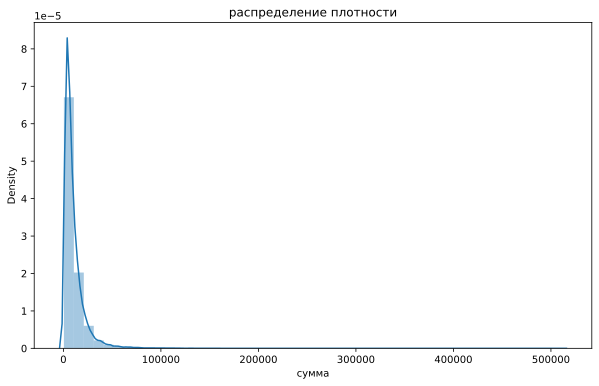

In [34]:
fig, axes = plt.subplots(1, 1, sharey=True)
ax=sns.distplot(df1['сумма'])
plt.title("распределение плотности")
plt.show()

4.3 на данном графике представлена распределение плотности по суммам. Распределение имеет логнормальный характер, с характерным максимум(характер зависимости напоминает дельта функцию), максимум продаж приходится на товары до 50ти тысяч
!!!Гипотеза:Распределение имеет логнормальный характер

Создание дополнительных признаков: 
объем продаж и суммарное количество

In [35]:
df.head()

,дата,транзакция,клиент,товар,количество,сумма,year,hours,time
0,2020-03-05 21:43:00,954,1,2874.0,1.0,8150.0,2020-03-05,21,0 days 21:43:00
1,2020-11-20 20:46:00,13796,1,3586.0,1.0,3930.0,2020-11-20,20,0 days 20:46:00
2,2020-08-12 16:28:00,14431,1,4942.0,1.0,2860.0,2020-08-12,16,0 days 16:28:00
3,2020-03-05 21:15:00,951,2,2812.0,1.0,4895.0,2020-03-05,21,0 days 21:15:00
4,2020-05-20 16:46:00,3352,2,5025.0,1.0,840.0,2020-05-20,16,0 days 16:46:00


In [36]:
df2=df.drop(columns=["дата","year","hours","time"])
df2=df2.groupby(df2['товар'])['количество','сумма'].sum()

In [37]:
df2['процент количества']=df2["количество"]/(df2["количество"].sum())*100
df2.head(1)

,количество,сумма,процент количества
товар,,,
1.0,1.0,1495.0,0.002121


In [38]:
df2['процент продаж']=df2["сумма"]/df2["сумма"].sum()*100
df2.head(1)

,количество,сумма,процент количества,процент продаж
товар,,,,
1.0,1.0,1495.0,0.002121,0.000303


In [39]:
df2.sort_values(by='процент продаж', ascending=True, inplace=True)
df2['кол-во продаж']=df2['процент продаж'].cumsum()

In [40]:
df2.head(1)

,количество,сумма,процент количества,процент продаж,кол-во продаж
товар,,,,,
3553.0,1.0,535.0,0.002121,0.000109,0.000109


In [41]:
df2.sort_values(by='процент количества', ascending=True,inplace=True)
df2['кол-во сумма']=df2['процент количества'].cumsum()

In [42]:
df2.head(1)

,количество,сумма,процент количества,процент продаж,кол-во продаж,кол-во сумма
товар,,,,,,
3553.0,1.0,535.0,0.002121,0.000109,0.000109,0.002121


<AxesSubplot:xlabel='кол-во продаж', ylabel='кол-во сумма'>

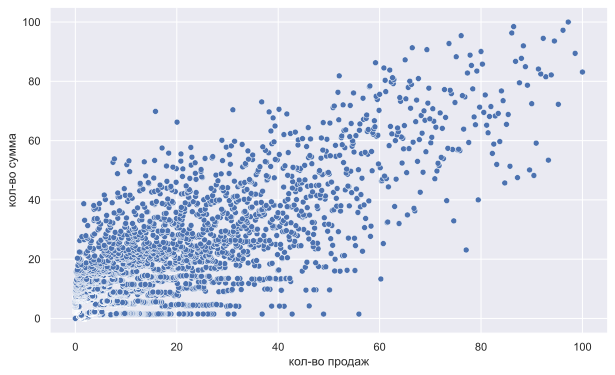

In [43]:
sns.set()
sns.scatterplot(x='кол-во продаж',y='кол-во сумма',data=df2)
#label

на данном графике представлены зависимиости дополнительных признаков. Из графика видно что эти признаки между собой коорелированы имеют положительную кореляцию

In [43]:
#sns.pairplot(df2)

**Корреляция**

In [44]:
df_cor=df2.corr()
df_cor

,количество,сумма,процент количества,процент продаж,кол-во продаж,кол-во сумма
количество,1.000000,0.733325,1.000000,0.733325,0.619322,0.713590
сумма,0.733325,1.000000,0.733325,1.000000,0.760954,0.638496
процент количества,1.000000,0.733325,1.000000,0.733325,0.619322,0.713590
процент продаж,0.733325,1.000000,0.733325,1.000000,0.760954,0.638496
кол-во продаж,0.619322,0.760954,0.619322,0.760954,1.000000,0.830603
кол-во сумма,0.713590,0.638496,0.713590,0.638496,0.830603,1.000000


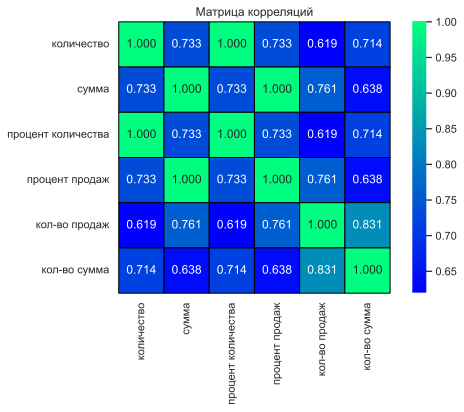

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
ax = sns.heatmap(data = df_cor, annot=True, square=True, 
            cmap='winter', fmt='.3f', linewidths=1, linecolor='black')
            
plt.title('Матрица корреляций')
plt.show()

на данном графике представлена матриуа корреляции. Из нее видно, что между собой признаки имеют сильную положительную связь.
Максимальный коэф корреляции между признаками "кол-во продаж" "кол-во сумма" коэф кор=0,8. Минимальный коэф корреляции между признаками "процент продаж" "кол-во сумма" коэф кор=0,8


In [25]:
df.describe()

,транзакция,клиент,товар,количество,сумма
count,47146.000000,47146.000000,47146.000000,47146.0,47146.000000
mean,13170.802974,4545.535867,3126.636745,1.0,10455.257645
std,7668.957751,3031.557668,1655.168978,0.0,12701.269894
min,1.000000,1.000000,1.000000,1.0,504.000000
25%,6373.250000,2000.000000,1822.000000,1.0,3810.000000
50%,13290.500000,3922.000000,3146.000000,1.0,6910.000000
75%,19749.000000,6903.000000,4803.000000,1.0,12750.000000
max,26512.000000,11050.000000,5523.000000,1.0,511500.000000


In [26]:
df2.describe()

NameError: name 'df2' is not defined

### 5.	Выполнить проверку гипотез о данных

5.1 Зависит ли частота покупок от месяца?

In [49]:
#Ваш код

In [44]:
time=df[['дата','сумма']]
time.set_index('дата',inplace=True)
time=time.resample('M').sum().sort_values('дата',ascending=True)

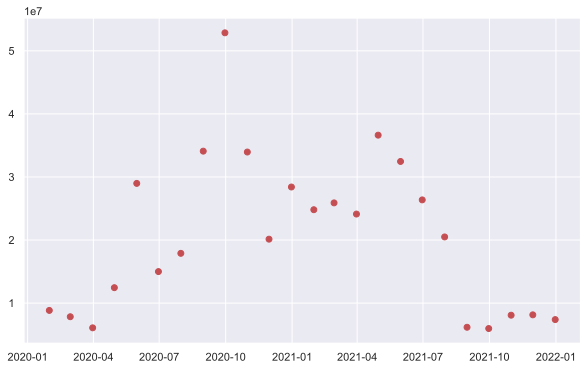

In [45]:
ax=plt.plot(time['сумма'],'ro')

гипотеза HO : среднее значение частоты покупок не зависит от месяца
гипотеза H1 : среднее значение частоты покупок  зависит от месяца


In [49]:
length=len(df)
df_p1=df['сумма'].loc[ :length/2]
df_p2=df['сумма'].loc[length/2: ]



In [50]:
stat, p = scipy.stats.ttest_ind(df_p1,df_p2)# тест t-student
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о равенстве средних')
else:
    print('Отклонить гипотезу о равенстве средних')

Statistics=-7.567, p-value=0.000
Отклонить гипотезу о равенстве средних


 Зависит ли частота покупок от месяца? ответ: зависит
 На графике представлен зависимость частоты покупок по месяцам. Видно что ,например, в октябре 2020 года был максимум покупок, а через год был минимум покупок. Проведенный тест  t-student подтвердил наше предположение

 5.2 Больше лучших клиентов, чем потерянных клиентов?
 
 Т.е. выяснить больше ли клиентов, которые покупали совсем недавно, чаще всего и тратят больше всего, 
 чем клиентов, у которых последняя покупка была давно, и покупали мало и тратили мало.

In [51]:
df.head(2)

,дата,транзакция,клиент,товар,количество,сумма,year,hours,time
0,2020-03-05 21:43:00,954,1,2874.0,1.0,8150.0,2020-03-05,21,0 days 21:43:00
1,2020-11-20 20:46:00,13796,1,3586.0,1.0,3930.0,2020-11-20,20,0 days 20:46:00


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47146 entries, 0 to 48302
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   дата        47146 non-null  datetime64[ns] 
 1   транзакция  47146 non-null  int64          
 2   клиент      47146 non-null  int64          
 3   товар       47146 non-null  float64        
 4   количество  47146 non-null  float64        
 5   сумма       47146 non-null  float64        
 6   year        47146 non-null  object         
 7   hours       47146 non-null  int64          
 8   time        47146 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1), timedelta64[ns](1)
memory usage: 4.6+ MB


In [ ]:
#df_52_=df[['дата','транзакция','клиент','товар','']]

In [54]:
df_52_=df.drop(columns=['year','hours','time'], axis=1)

In [55]:
df_52_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47146 entries, 0 to 48302
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   дата        47146 non-null  datetime64[ns]
 1   транзакция  47146 non-null  int64         
 2   клиент      47146 non-null  int64         
 3   товар       47146 non-null  float64       
 4   количество  47146 non-null  float64       
 5   сумма       47146 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 3.5 MB


now=df_52_['дата'].max()
df_52=df_52_.groupby(['транзакция','клиент','дата'])['количество','сумма'].sum()\
.reset_index()\
.groupby(['клиент']).agg({'дата':lambda x:(now-x.max()).days,
                         'транзакция':lambda x:len(x),
                          "сумма":lambda x:x.sum()})
#Ваш код5.2 Больше лучших клиентов, чем потерянных клиентов?



In [72]:
now=df_52_['дата'].max()
df_52=df_52_.groupby(['транзакция','клиент','дата'])['количество','сумма'].sum()\
.drop_dublicates()\
.groupby(['клиент']).agg({'дата':lambda x:(now-x.max()).days,
                         'транзакция':lambda x:len(x),
                          "сумма":lambda x:x.sum()})

AttributeError: 'DataFrame' object has no attribute 'drop_dublicates'


df_52.duplicated().sum()

df_52=df_52.drop_duplicates()

df_52['транзакция'].duplicated().sum()

In [67]:
df_52=df_52[~df_52.duplicated(subset='транзакция')]

In [112]:
#df_52.isnull().sum()

дата                  0
транзакция            0
сумма                 0
квантили _затраты     0
квантили _давность    0
dtype: int64

In [62]:
bin_labels=['1','2','3','4']
bin_labels2=['1','2']

In [63]:
bin_labels

['1', '2', '3', '4']

In [68]:
df_52['квантили _затраты']=pd.qcut(df_52['сумма'],[0, 0.25, 0.5, 0.75,1], labels=bin_labels)
df_52['квантили _давность']=pd.qcut(df_52['дата'],[0, 0.25,0.5,0.75,1], labels=bin_labels)
df_52['квантили _частоты']=pd.qcut(df_52['транзакция'],[0, 0.25,0.5,0.75,1], labels=bin_labels)
df_52['категории клиентов']=df_52['квантили _затраты'].astype(str)+df_52['квантили _давность'].astype(str)+df_52['квантили _частоты'].astype(str)

In [69]:
df_52.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 1 to 3799
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   дата                45 non-null     int64   
 1   транзакция          45 non-null     int64   
 2   сумма               45 non-null     float64 
 3   квантили _затраты   45 non-null     category
 4   квантили _давность  45 non-null     category
 5   квантили _частоты   45 non-null     category
 6   категории клиентов  45 non-null     object  
dtypes: category(3), float64(1), int64(2), object(1)
memory usage: 2.5+ KB


In [70]:
df_52[df_52['категории клиентов']=='111'].транзакция.count()

1

In [71]:
df_52[df_52['категории клиентов']=='444'].транзакция.count()

0

### 6. Кластеризация по товарам

In [191]:
#Ваш код 
#трансфомация датасета

scaler = StandardScaler()
X_st = scaler.fit_transform(df2)

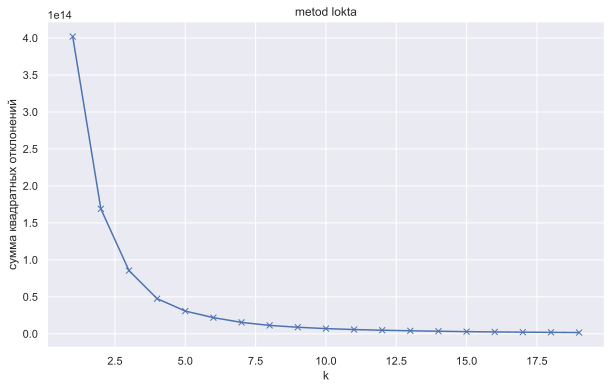

In [197]:
sum_sqdist=[]
K=range(1,20)
for k in K:
    km=KMeans(n_clusters=k)
    #kf=km.fit(df[['количество','сумма']])
    kf=km.fit(df2)
    sum_sqdist.append(km.inertia_)
plt.plot(K,sum_sqdist,'bx-')
plt.title('metod lokta')
plt.xlabel('k')
plt.ylabel('сумма квадратных отклонений')
plt.show()

для кластеризацию используем dataset с df2, в котором увеличили признаковое пространство.
Выбираем 5 кластеров. Это определяется из графика суммы квадратных отклонений("метод локтя").
При k=5 функция резко начинает медленно уменьшаться, что может говорить об оптимальном количестве кластеров

In [198]:
#
#kmeans=KMeans(n_clusters=5, random_state=0).fit(X_st)
#predict=kmeans.predict(X_st)

kmeans=KMeans(n_clusters=5, random_state=0).fit(df2[['количество','сумма']])
predict=kmeans.predict(df2[['количество','сумма']])
df2['claster']=predict


In [199]:
df2.head()

,количество,сумма,процент количества,процент продаж,кол-во продаж,кол-во сумма,claster
товар,,,,,,,
3553,1,535.0,0.002121,0.000109,0.000109,0.002121,0
1378,1,11000.0,0.002121,0.002232,1.806957,0.004242,0
56,1,10960.0,0.002121,0.002223,1.795810,0.006363,0
4496,1,10950.0,0.002121,0.002221,1.793586,0.008484,0
4533,1,10950.0,0.002121,0.002221,1.791365,0.010605,0


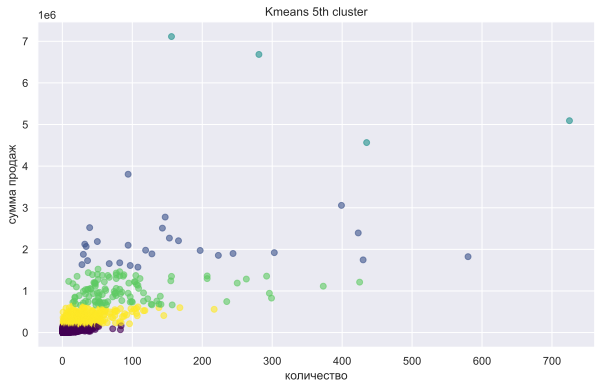

In [200]:
plt.scatter(df2['количество'], df2['сумма'], c=kmeans.labels_,cmap='viridis',alpha=0.6)
plt.title('Kmeans 5th cluster')
plt.xlabel('количество')
plt.ylabel('сумма продаж')
plt.show()

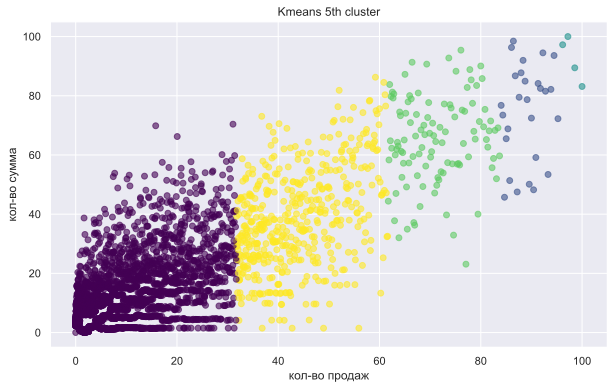

In [201]:
plt.scatter(df2['кол-во продаж'], df2['кол-во сумма'], c=kmeans.labels_,cmap='viridis',alpha=0.6)
plt.title('Kmeans 5th cluster')
plt.xlabel('кол-во продаж')
plt.ylabel('кол-во сумма')
plt.show()

In [151]:
df2.head()

,товар,количество,сумма,процент количества,процент продаж,кол-во продаж,кол-во сумма,claster
3429,3553.0,1,535.0,0.002121,0.000109,0.000109,0.002121,1
1339,1378.0,1,11000.0,0.002121,0.002232,1.806957,0.004242,4
54,56.0,1,10960.0,0.002121,0.002223,1.795810,0.006363,4
4313,4496.0,1,10950.0,0.002121,0.002221,1.793586,0.008484,6
4348,4533.0,1,10950.0,0.002121,0.002221,1.791365,0.010605,6


In [ ]:
на графиках визуализация кластеров. При использовании матрице с первоначальном набором признаков кластеризация по классам происходит неравномерно,
При добавлении признаков кластеризация по классам происходит равномерно с четкими границами кластеров. При этом видно, что наиболее 
"многочисленные" кластеры покупателей, которые совершают дешевые покупки и самый "немногочисленный" кластер покупателей, которые совершают
дорогие покупки.

### 7. Важные признаки

In [152]:
X = df2[['количество','сумма', 'процент количества', 'процент продаж', 'кол-во продаж','кол-во сумма']]
y = df2['количество']

In [153]:

#X = df2[['сумма', 'количество', 'кол-во продаж', 'кол-во сумма']]
#y = df2['количество']

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score')) 

                Specs         Score
1               сумма  3.409810e+09
0          количество  4.474204e+05
5        кол-во сумма  1.043309e+05
4       кол-во продаж  8.785215e+04
2  процент количества  9.490104e+02
3      процент продаж  6.917523e+02


В  разделе "важные признаки" были найдены наиболее важные признаки в datasete с использованием метода chi-square test. Он показал, что наиболее важный признак  умма и количество соответственно.

In [134]:
df.head()

,дата,транзакция,клиент,товар,количество,сумма,time,year,hours,month
0,2020-03-05 21:43:00,954,1,2874.0,1.0,8150.0,21:43:00,2020-03-05,21,3
1,2020-11-20 20:46:00,13796,1,3586.0,1.0,3930.0,20:46:00,2020-11-20,20,11
2,2020-08-12 16:28:00,14431,1,4942.0,1.0,2860.0,16:28:00,2020-08-12,16,8
3,2020-03-05 21:15:00,951,2,2812.0,1.0,4895.0,21:15:00,2020-03-05,21,3
4,2020-05-20 16:46:00,3352,2,5025.0,1.0,840.0,16:46:00,2020-05-20,16,5


### 8.	Рекомендации

In [204]:

#from surprise.prediction_algorithms.knns import KNNBasic
from surprise import Dataset, Reader
from surprise.prediction_algorithms.matrix_factorization import SVD

In [205]:
all_user_items=df[['клиент','товар','количество']].groupby(['клиент','товар']).sum()\
.sort_values('количество',ascending=False).reset_index()


In [206]:
all_user_items.head(2)

,клиент,товар,количество
0,4997,2602,21
1,22,5302,19


In [207]:
all_user_items.duplicated().sum()

0

создание модели

In [208]:
reader = Reader(line_format='user item rating', sep=',', rating_scale=(0,5), skip_lines=1)

data = Dataset.load_from_df(df[['клиент','товар','количество']], reader=reader)

In [209]:
data = Dataset.load_from_df(all_user_items[['клиент','товар','количество']], reader=reader)

In [210]:
data

In [211]:
trainset = data.build_full_trainset()
svd = SVD()

In [212]:
svd.fit(trainset)

In [213]:
a=svd.predict(22,5302,21)


In [214]:
print(a)

user: 22         item: 5302       r_ui = 21.00   est = 5.00   {'was_impossible': False}


In [215]:
all_user_items.rename(columns={'клиент': 'user_id','товар':'product_id','количество':'rating'}, inplace=True)

мы будем заполнять матрицу взаимодействия пользователя и элемента и давать рекомендации

In [216]:
all_user_items.head(2)

,user_id,product_id,rating
0,4997,2602,21
1,22,5302,19


In [217]:
def get_recommendations(data, product_id, user_id, top_n, algo):    
    recommendations = []
    user_matrix = data.pivot(index='user_id', columns="product_id", values='rating')
   
    user_matrix1 = user_matrix.loc[user_id][user_matrix.loc[user_id].isnull()].index.tolist()
    
    for item_id in user_matrix1:        
        est = algo.predict(user_id, item_id).est        
        #product_id = product_id[item_id]#.values[0]
        recommendations.append((item_id, est))

    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] 

In [218]:
get_recommendations(data=all_user_items, product_id='product_id', user_id=4,top_n=5, algo=svd)

[(1066, 2.2401398085838644),
 (322, 2.2031304056274945),
 (4803, 2.201214224539072),
 (434, 2.151983744952124),
 (2699, 2.026367413163766)]

В разделе "рекомендации" создала функцию  "get_recommendations", котрая рекомендует выбранному покупателю купить 5 других товар, на основе его ранее сделанных покупок. модель обучалось на основе метода SVD(матричного разложения)